# Model Creation & Evaluation

## Importing Lib & Models

In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [37]:
# import necssary models
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, silhouette_score
from sklearn.decomposition import PCA

In [38]:
df=pd.read_csv("PCA_Data.csv",header=0)
df = df.apply(pd.to_numeric, errors='coerce').dropna()
df.head() 

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0  2.932714  0.202257  1.287816  2.378876  2.287999 -0.218612 -0.149580   
1  3.494585 -0.062419  1.443774  2.310643  2.188582  0.463230  0.595294   
2  3.904867  0.849239  0.904279  2.344430  2.435261  0.418115  0.163359   
3 -1.453569  0.760201  0.983002  1.691030  0.848719  0.144508 -0.304081   
4  2.719665  0.239851  0.800830  1.830279  1.693064 -0.168011  0.094810   

       pca8      pca9     pca10  
0 -0.541553  0.110919  0.597361  
1 -0.589978  0.515925  0.581999  
2 -0.469478 -0.211222  0.620212  
3 -0.305256  0.210669  0.165455  
4 -0.377763 -0.082434  0.382101

## Model:

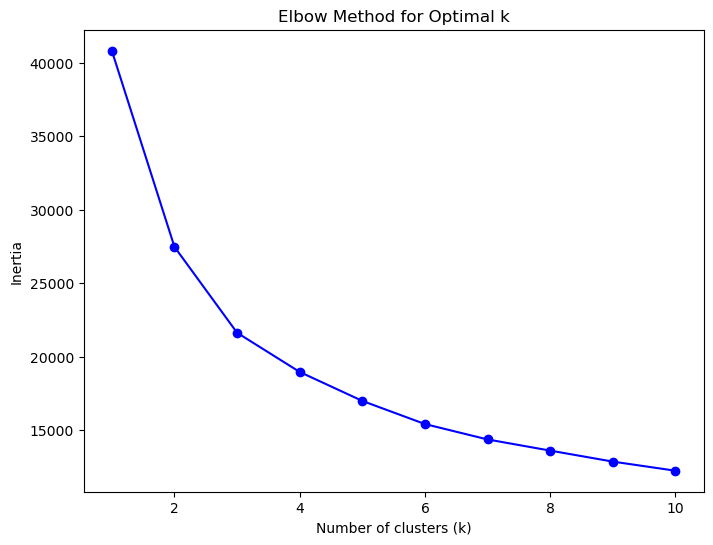

In [39]:
X = df.values  
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [40]:
kmeans = KMeans(n_clusters=3,random_state=45)
kmeans.fit(X)
kmeans.labels_
df['cluster'] = pd.DataFrame(kmeans.labels_)

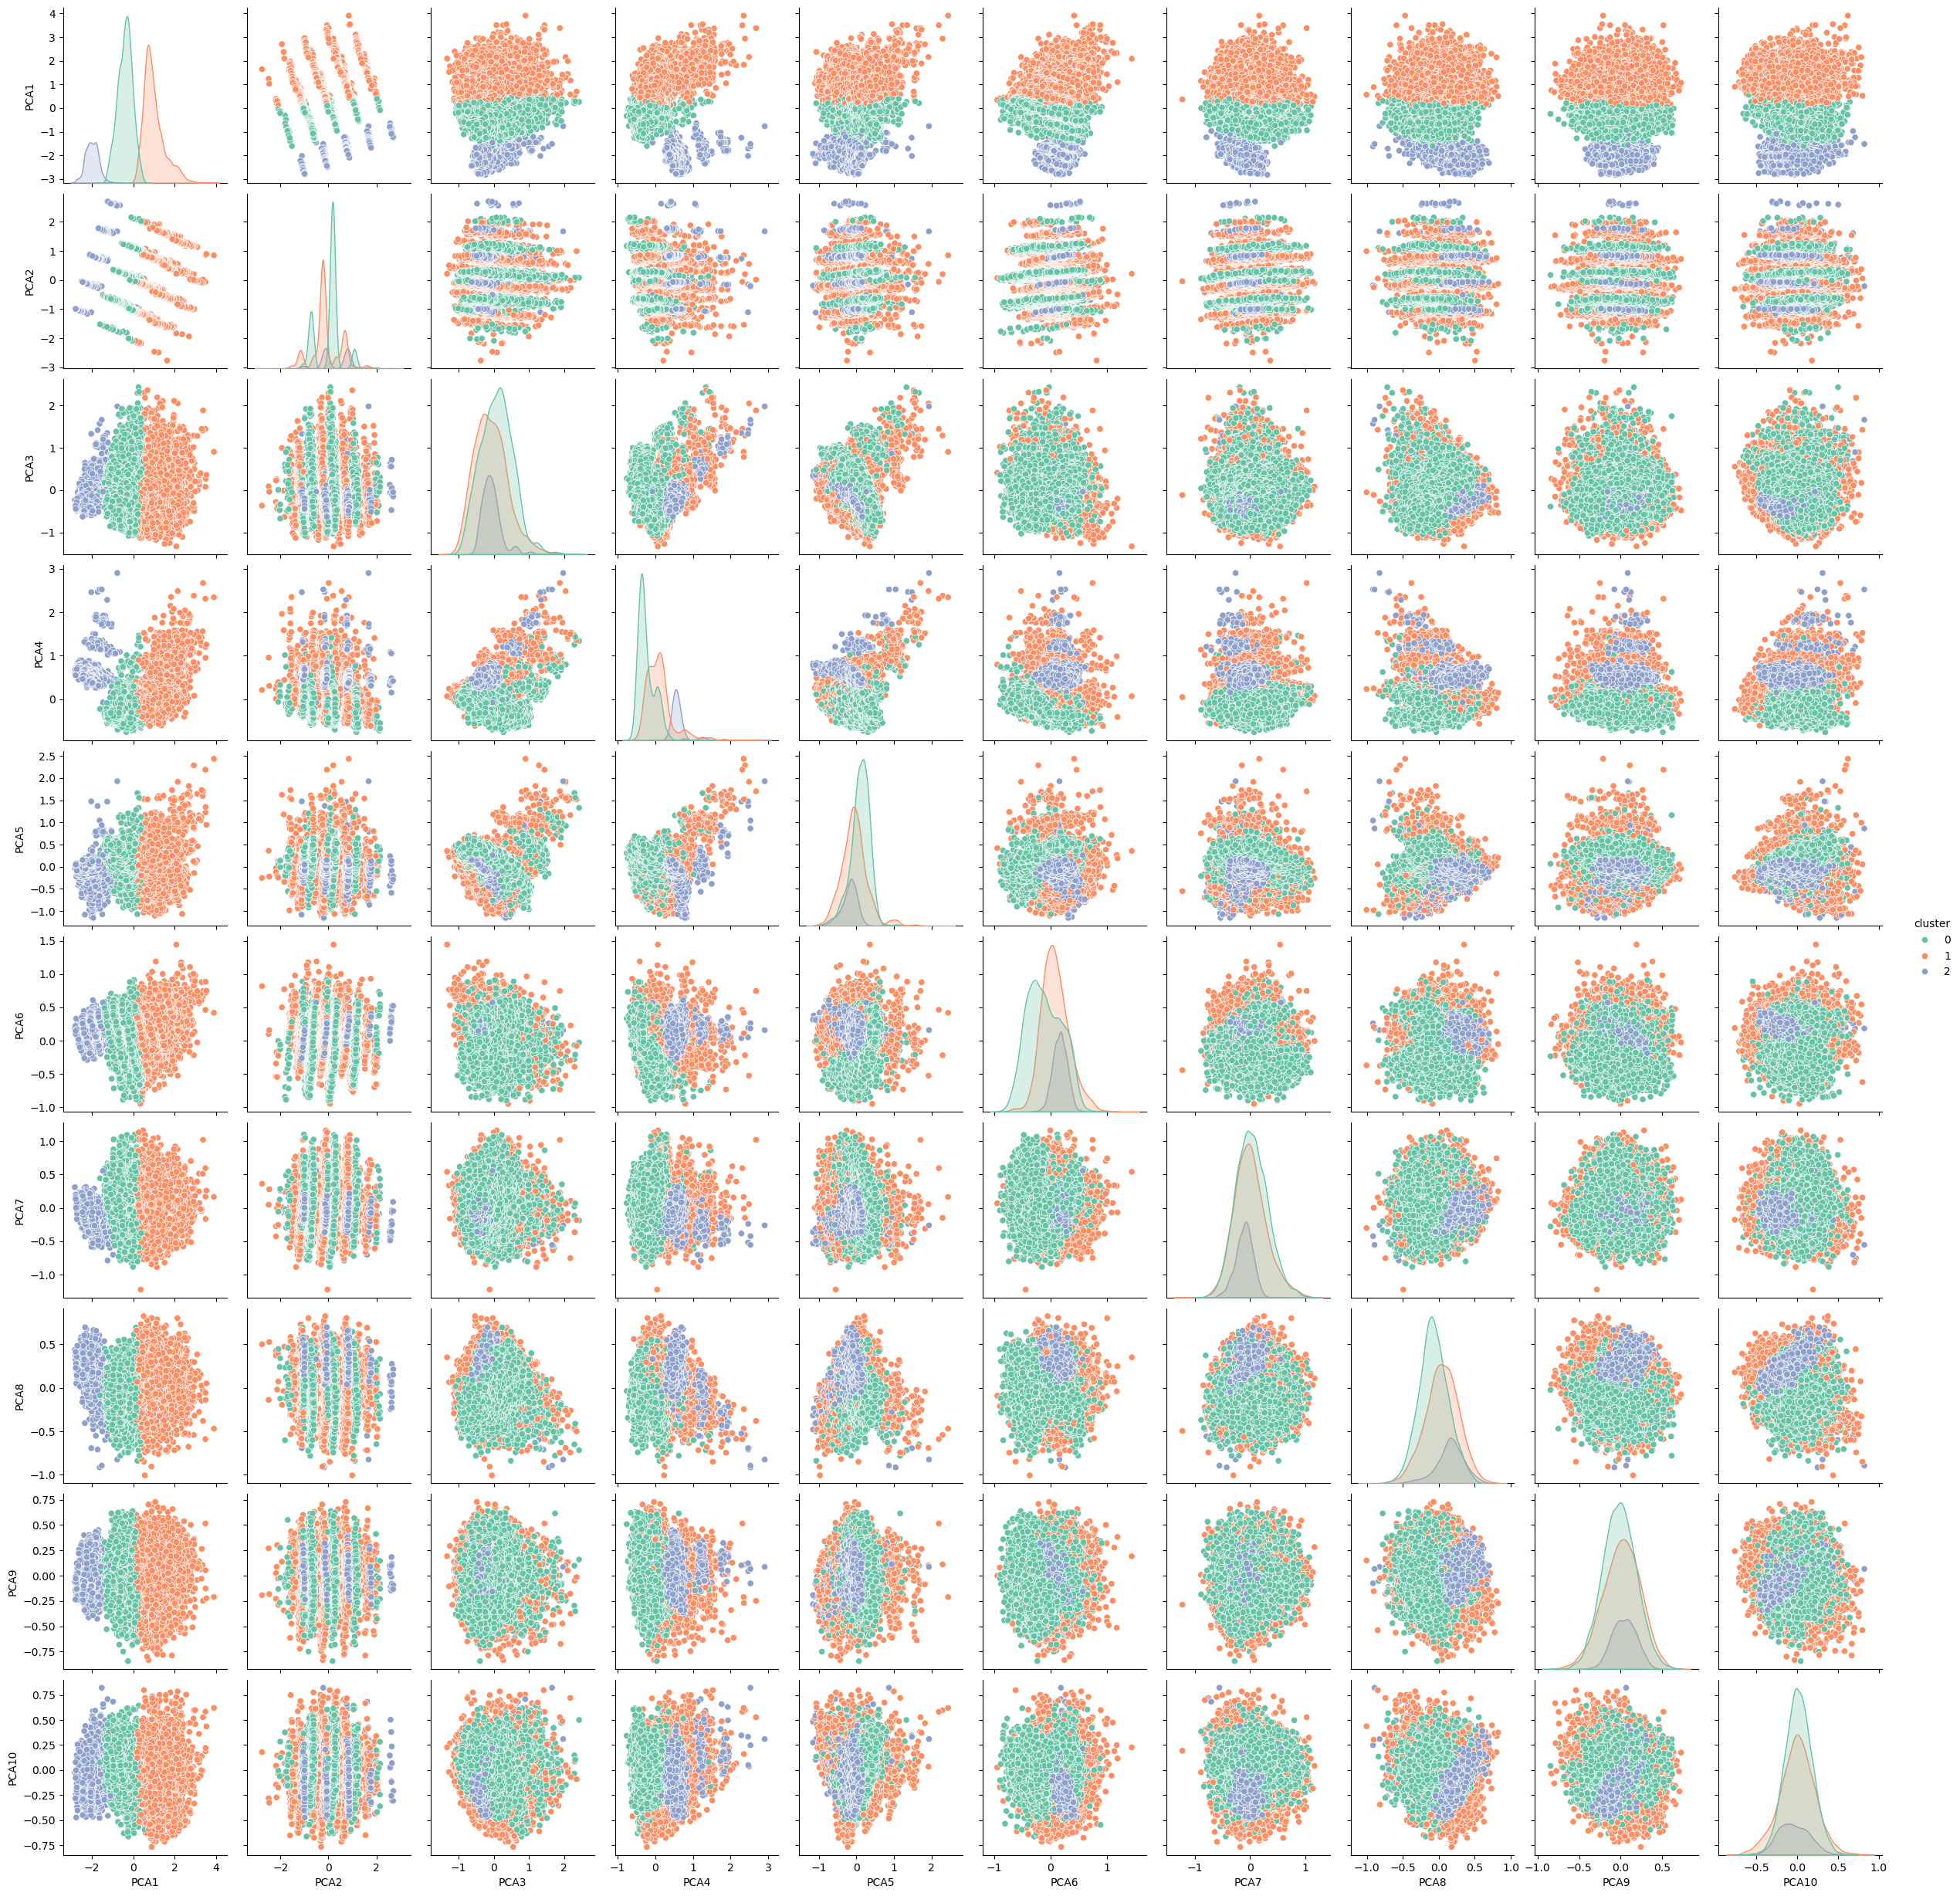

In [41]:
pca = PCA(n_components=10)
pca_components = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_components,columns=[f'PCA{i}' for i in range(1, 11)])
pca_df['cluster'] = kmeans.labels_

sns.pairplot(pca_df,hue='cluster',diag_kind='kde',palette='Set2')
plt.show()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,)

### 1. Linear Regression

In [51]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_train_r2 = r2_score(y_train, lr.predict(X_train))
lr_test_r2 = r2_score(y_test, lr.predict(X_test))

print("Linear Regression")
print("Train R2:", lr_train_r2)
print("Test R2 :", lr_test_r2)

Linear Regression
Train R2: 0.8435644796033306
Test R2 : 0.8363820863072148


### 2. RandomForestRegressor

In [43]:
rf = RandomForestRegressor(n_estimators=100, random_state=45)
rf.fit(X_train, y_train)

rf_train_r2 = r2_score(y_train, rf.predict(X_train))
rf_test_r2 = r2_score(y_test, rf.predict(X_test))

print("Random Forest")
print("Train R2:", rf_train_r2)
print("Test R2 :", rf_test_r2)

Random Forest
Train R2: 0.9988828216389598
Test R2 : 0.9908400333017868


### 3. KMeans

In [44]:
kmeans = KMeans(n_clusters=3, random_state=45)
k_labels = kmeans.fit_predict(X)

k_sil = silhouette_score(X, k_labels)

print("KMeans")
print("Silhouette Score:", k_sil)

KMeans
Silhouette Score: 0.30205528697184


### 4. MiniBatchKMeans

In [45]:
mbk = MiniBatchKMeans(n_clusters=3, random_state=45, batch_size=100)
mbk_labels = mbk.fit_predict(X)

mbk_sil = silhouette_score(X, mbk_labels)

print("MiniBatchKMeans")
print("Silhouette Score:", mbk_sil)

MiniBatchKMeans
Silhouette Score: 0.2555997940217106


## Final Result

In [46]:
results = [["Linear Regression", lr_train_r2, lr_test_r2, None],
    ["Random Forest", rf_train_r2, rf_test_r2, None],
    ["KMeans", None, None, k_sil],
    ["MiniBatchKMeans", None, None, mbk_sil],]

results_df = pd.DataFrame(results,columns=["Model", "Train R2", "Test R2", "Silhouette Score"])
results_df


Model  Train R2  Test R2  Silhouette Score
0  Linear Regression  0.841097  0.84625               NaN
1      Random Forest  0.998883  0.99084               NaN
2             KMeans       NaN      NaN          0.302055
3    MiniBatchKMeans       NaN      NaN          0.255600